In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
path = kagglehub.dataset_download("satyajeetbedi/email-hamspam-dataset")
emails = pd.read_csv(path + "/email_spam.csv", encoding='ISO-8859-1')

In [4]:
emails

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
emails.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [7]:
emails

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
emails.rename(columns= {'v1': 'target', 'v2':'text'}, inplace=True)

In [9]:
emails

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
emails['target'] = encoder.fit_transform(emails['target'])

In [11]:
emails

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
## Check for duplicate values
emails.duplicated().sum()

403

In [13]:
## Remove duplicates
emails = emails.drop_duplicates(keep='first')

In [14]:
emails

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


[]

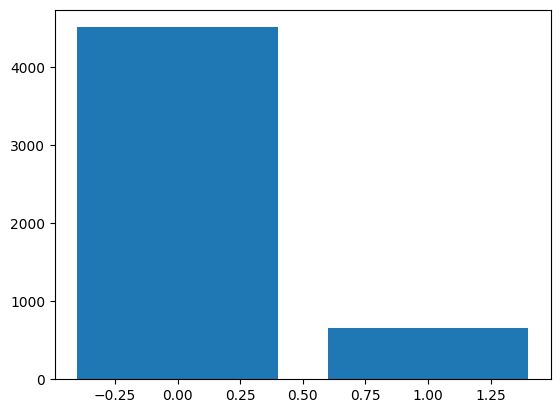

In [15]:
plt.bar(x=emails.target.value_counts().index, height=emails.target.value_counts().values)
plt.plot()

In [16]:
emails.target.value_counts()
## Set imbalansat

,count
target,
0,4516
1,653


In [20]:
emails['num_characters'] = emails['text'].apply(len)
emails['num_words'] = emails['text'].apply(lambda x: len(nltk.word_tokenize(x)))
emails['num_sentences'] = emails['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

<ipython-input-20-0cc7e5fd2b7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails['num_characters'] = emails['text'].apply(len)
<ipython-input-20-0cc7e5fd2b7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails['num_words'] = emails['text'].apply(lambda x: len(nltk.word_tokenize(x)))
<ipython-input-20-0cc7e5fd2b7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [21]:
emails

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [23]:
emails[emails.target == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
emails[emails.target == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


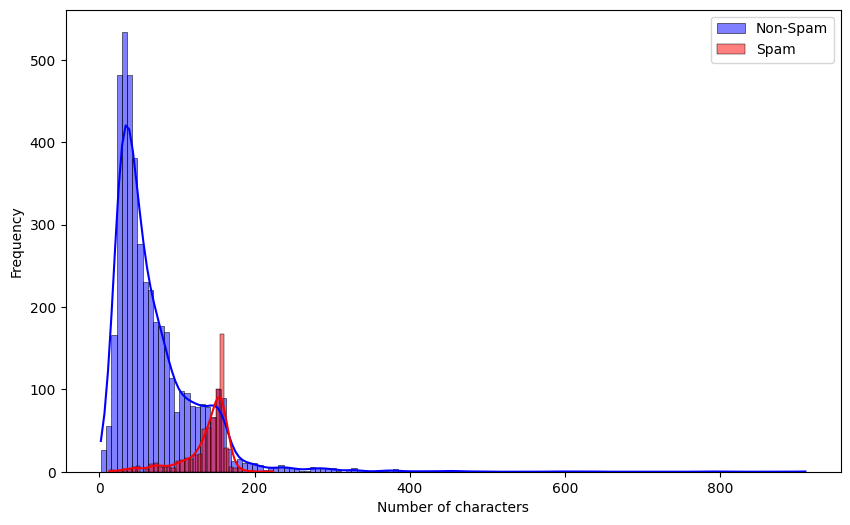

In [25]:
plt.figure(figsize=(10, 6))

sns.histplot(emails[emails.target == 0]['num_characters'], color='blue', label='Non-Spam', kde=True)
sns.histplot(emails[emails.target == 1]['num_characters'], color='red', label='Spam', kde=True)

plt.xlabel('Number of characters')
plt.ylabel('Frequency')

plt.legend()
plt.show()

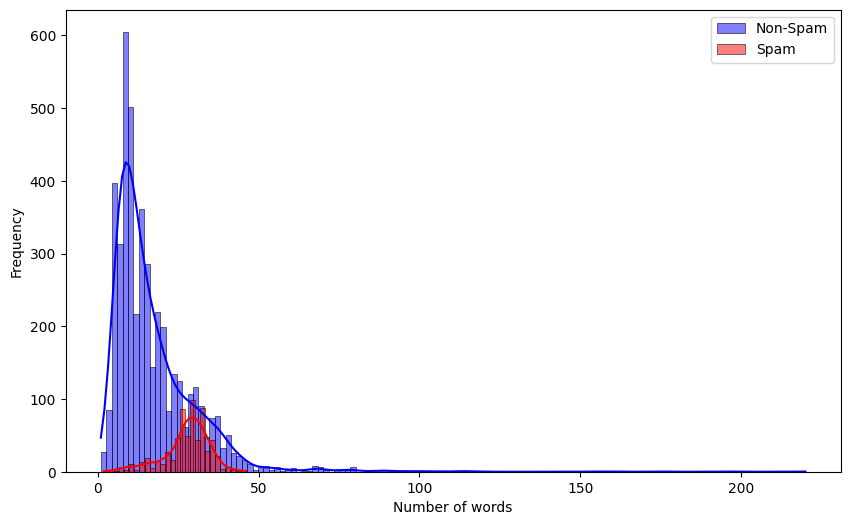

In [26]:
plt.figure(figsize=(10, 6))

sns.histplot(emails[emails.target == 0]['num_words'], color='blue', label='Non-Spam', kde=True)
sns.histplot(emails[emails.target == 1]['num_words'], color='red', label='Spam', kde=True)

plt.xlabel('Number of words')
plt.ylabel('Frequency')

plt.legend()
plt.show()

# Text cleaning

In [27]:
!pip install simplemma

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 MB 5.3 MB/s eta 0:00:00


In [34]:
import simplemma
import re

def text_cleaner(text: str):
  ## lowercase
  text = text.lower()

  ## tokenizare
  text = nltk.word_tokenize(text)
  # print(text)

  ## punctuation
  text = [token for token in text if token.isalnum()]
  # print(text

  ## stopwords
  tokens_no_stop = [word for word in text if word not in stopwords.words('english')]
  # print(tokens_no_stop)

  ## lemmantization and steeming
  text = " ".join([simplemma.lemmatize(token, 'en') for token in tokens_no_stop])
  # print(text)

  # newline and extra white spaces
  text = text.replace('\n', ' ')
  text = re.sub(r'\s+', ' ', text).strip()

  return text


clean_text = text_cleaner(emails.text[0])
print(clean_text)


go jurong point crazy available bugis n great world la e buffet cine get amore wat


In [35]:
emails['transformed_text'] = emails['text'].apply(text_cleaner)

<ipython-input-35-0e6e7ef62b77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails['transformed_text'] = emails['text'].apply(text_cleaner)


In [36]:
emails

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time try 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood suggestion
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buying something e...


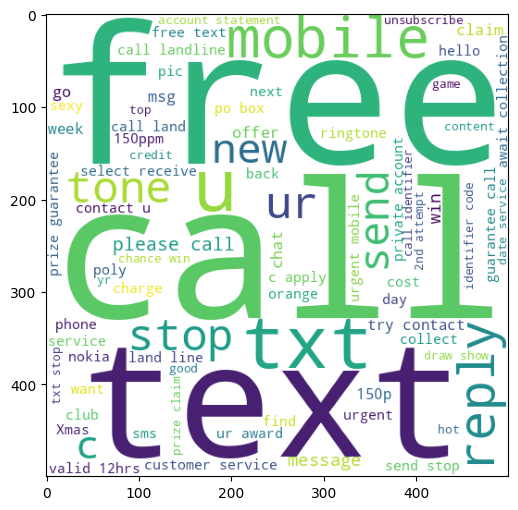

In [38]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(emails[emails.target == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.show()

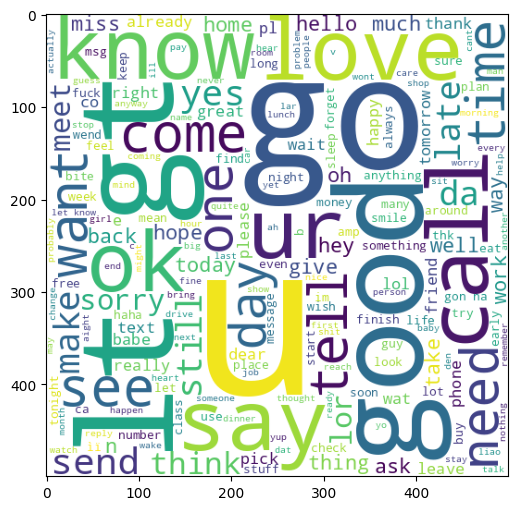

In [39]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(emails[emails.target == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)
plt.show()

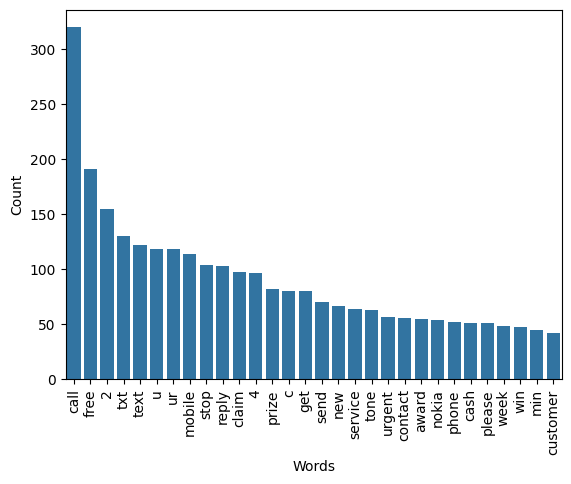

In [40]:
spam_corpos = []
for sentence in emails[emails.target==1]['transformed_text'].to_list():
  for word in sentence.split():
    spam_corpos.append(word)

from collections import Counter
filter_df = pd.DataFrame(Counter(spam_corpos).most_common(30))
sns.barplot(data=filter_df, x = filter_df[0], y=filter_df[1])
plt.xticks(rotation = 90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()


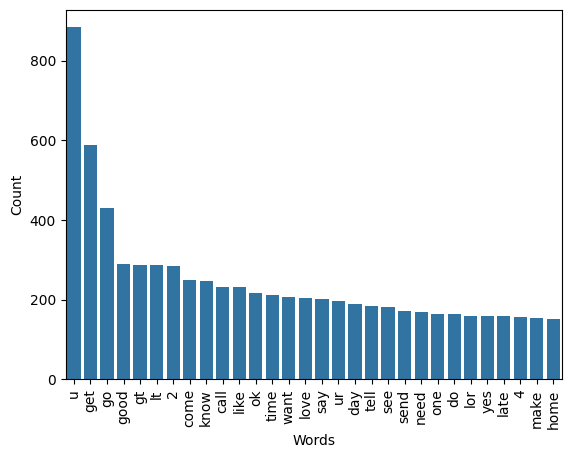

In [41]:
ham_corpos = []
for sentence in emails[emails.target==0]['transformed_text'].to_list():
  for word in sentence.split():
    ham_corpos.append(word)

filter_ham_df = pd.DataFrame(Counter(ham_corpos).most_common(30))
sns.barplot(data=filter_ham_df, x = filter_ham_df[0], y=filter_ham_df[1])
plt.xticks(rotation = 90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=1024)

In [43]:
X = tfid.fit_transform(emails.transformed_text).toarray()
y = emails.target.values

In [45]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

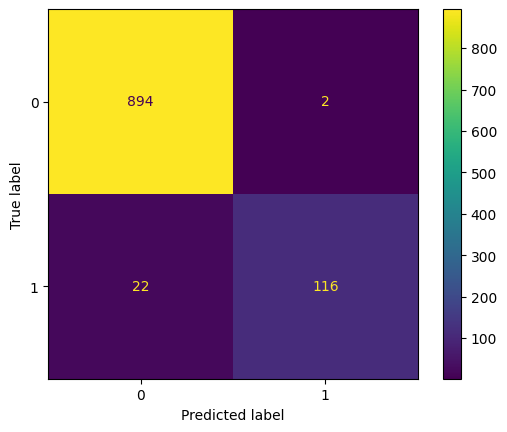

--------------------------------------------------
Classifier:  SVC
Accuracy:  0.97678916827853
Precision:  0.9830508474576272
Recall:  0.8405797101449275
F1:  0.90625


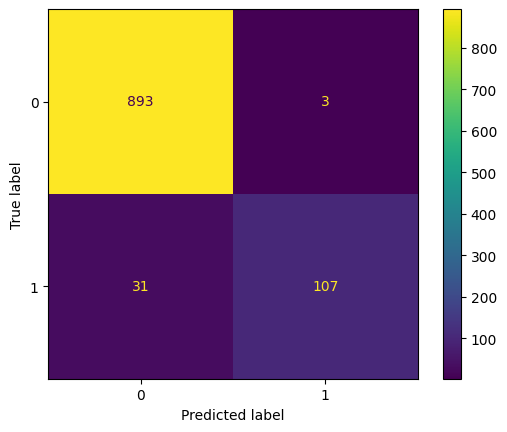

--------------------------------------------------
Classifier:  LR
Accuracy:  0.9671179883945842
Precision:  0.9727272727272728
Recall:  0.7753623188405797
F1:  0.8629032258064516


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# svc = SVC(kernel="sigmoid", gamma=1.0)
svc = SVC(kernel="rbf", gamma=1.0, C=1.0)
lrc = LogisticRegression(penalty='l2', solver='lbfgs')

clfs = {'SVC': svc,
        'LR': lrc}

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

def train_classifier(clfs, X_train, y_train, X_test, y_test):
  clfs.fit(X_train, y_train)
  y_pred = clfs.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
  disp.plot()
  plt.show()

  return accuracy, precision, f1, recall


for name, clfs in clfs.items():
  accuracy, precision, f1, recall = train_classifier(clfs, X_train, y_train, X_test, y_test)
  print("--------------------------------------------------")
  print("Classifier: ", name)
  print("Accuracy: ", accuracy)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1: ", f1)
